# Introduction

The notebook is intended to show Seaborn plot examples.

In [1]:
# Import Standard Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read data
data = sns.load_dataset('titanic')

In [6]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Plots

## Counterplot

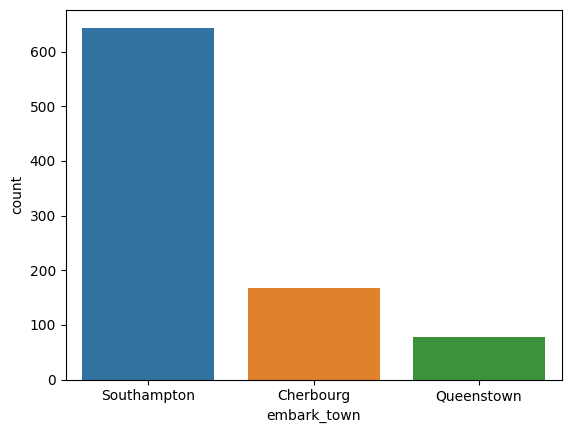

In [8]:
# Plot 'counterplot' of 'embark_town'
_ = sns.countplot(data=data, x='embark_town')

## Barplot

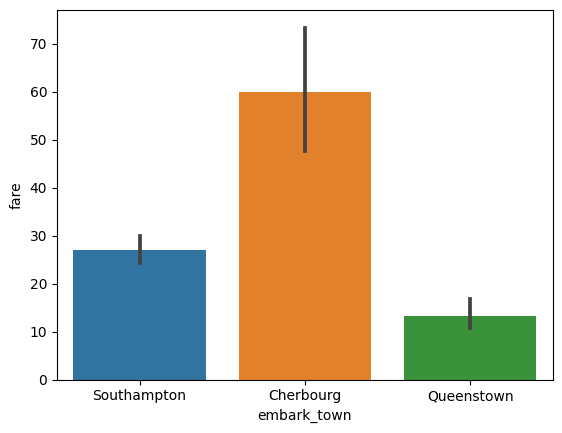

In [10]:
# Plot 'barplot' of 'fare' for 'embark_town'
_ = sns.barplot(data=data, x='embark_town', y='fare')